In [18]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..\..')

from Crypto.lib.backtest_statistics import account_curve_statistics

In [2]:
close = pd.read_csv("../data/close.csv", index_col=0, parse_dates=True)
close.drop(["ETH-BTC", "BTC-EUR"], axis=1, inplace=True)
close.loc["2017-06-02", "DOGE"] = np.nan
close = close.resample("5T", label='right').last().ffill()

returns = close.pct_change()
# vol = returns.ewm(span=288).std() # One day

In [4]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844133 entries, 2013-04-01 00:35:00 to 2021-04-10 00:55:00
Freq: 5T
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ADA     327176 non-null  float64
 1   BAT     341896 non-null  float64
 2   BCH     388043 non-null  float64
 3   BNT     388231 non-null  float64
 4   BSV     247979 non-null  float64
 5   BTC     844133 non-null  float64
 6   BTG     361739 non-null  float64
 7   CVC     397147 non-null  float64
 8   DAI     316333 non-null  float64
 9   DASH    414725 non-null  float64
 10  DCR     202327 non-null  float64
 11  DOGE    405562 non-null  float64
 12  EOS     397163 non-null  float64
 13  ETC     449290 non-null  float64
 14  ETH     534469 non-null  float64
 15  FUN     379109 non-null  float64
 16  HT      220460 non-null  float64
 17  ICX     370603 non-null  float64
 18  IOST    299128 non-null  float64
 19  KNC     300678 non-null  float64
 20  LINK 

In [5]:
returns.describe()

,ADA,BAT,BCH,BNT,BSV,BTC,BTG,CVC,DAI,DASH,...,WAVES,XEM,XLM,XMR,XRP,XTZ,XVG,ZEC,ZIL,ZRX
count,327175.000000,341895.000000,388042.000000,388230.000000,247978.000000,844132.000000,361738.000000,397146.000000,316332.000000,414724.000000,...,169039.000000,405545.000000,440239.000000,449278.000000,440362.000000,396451.000000,370631.000000,449288.000000,298789.000000,379306.000000
mean,0.000028,0.000037,0.000099,0.000087,0.000027,0.000029,0.000171,0.000143,0.000002,0.000037,...,0.000028,0.000019,0.000096,0.000053,0.000066,0.000414,0.000100,0.000838,0.001329,0.000093
std,0.007779,0.010159,0.014349,0.016946,0.006808,0.011481,0.018974,0.017204,0.002247,0.008334,...,0.004942,0.005855,0.029436,0.009644,0.010484,0.028850,0.017704,0.397037,0.623844,0.014189
min,-0.607143,-0.801637,-0.469728,-0.883542,-0.186750,-0.903971,-0.529137,-0.563448,-0.309897,-0.656270,...,-0.323697,-0.251689,-0.381395,-0.239117,-0.292992,-0.447371,-0.880443,-0.995784,-0.622791,-0.709775
25%,-0.001061,0.000000,-0.001410,-0.001501,-0.001640,-0.000705,-0.001630,0.000000,0.000000,-0.001450,...,0.000000,-0.001365,-0.001069,-0.001538,-0.002053,-0.002785,-0.000864,-0.001662,-0.000882,-0.002448
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.001092,0.000000,0.001406,0.001505,0.001617,0.000754,0.001596,0.000000,0.000000,0.001460,...,0.000000,0.001352,0.001087,0.001576,0.002081,0.002821,0.000656,0.001645,0.000979,0.002473
max,2.634601,4.108520,1.133913,7.051212,0.448994,9.000333,1.213969,1.329384,0.448494,0.812554,...,0.457353,0.231334,18.390744,0.341751,0.428571,1.727255,7.458192,236.890000,340.818182,2.962443


# Mean return per hour, day of week, day of month

In [22]:
df_cal = returns.stack().reset_index()
df_cal.columns = ["datetime", "asset", "return"]
df_cal["hour"] = df_cal["datetime"].dt.hour
df_cal["day"] = df_cal["datetime"].dt.day
df_cal["day_of_week"] = df_cal["datetime"].dt.dayofweek
df_cal["day_of_week"] = df_cal["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [12]:
df_cal

,datetime,asset,return,hour,day,day_of_week
0,2013-04-01 00:40:00,BTC,0.000000,0,1,Monday
1,2013-04-01 00:45:00,BTC,0.000000,0,1,Monday
2,2013-04-01 00:50:00,BTC,0.000000,0,1,Monday
3,2013-04-01 00:55:00,BTC,0.000000,0,1,Monday
4,2013-04-01 01:00:00,BTC,0.000000,1,1,Monday
...,...,...,...,...,...,...
18131447,2021-04-10 00:55:00,XTZ,-0.025825,0,10,Saturday
18131448,2021-04-10 00:55:00,XVG,0.000919,0,10,Saturday
18131449,2021-04-10 00:55:00,ZEC,-0.003130,0,10,Saturday
18131450,2021-04-10 00:55:00,ZIL,-0.008249,0,10,Saturday


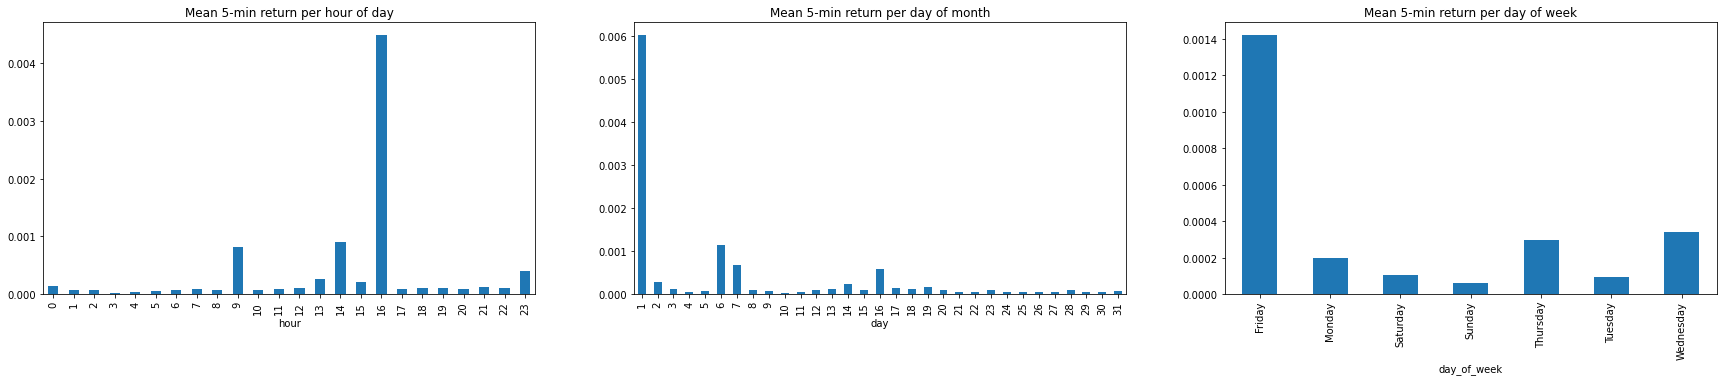

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
df_cal.groupby("hour")["return"].mean().plot.bar(ax=axes[0], title="Mean 5-min return per hour of day");
df_cal.groupby("day_of_week")["return"].mean().plot.bar(ax=axes[2], title="Mean 5-min return per day of week");
df_cal.groupby("day")["return"].mean().plot.bar(ax=axes[1], title="Mean 5-min return per day of month");

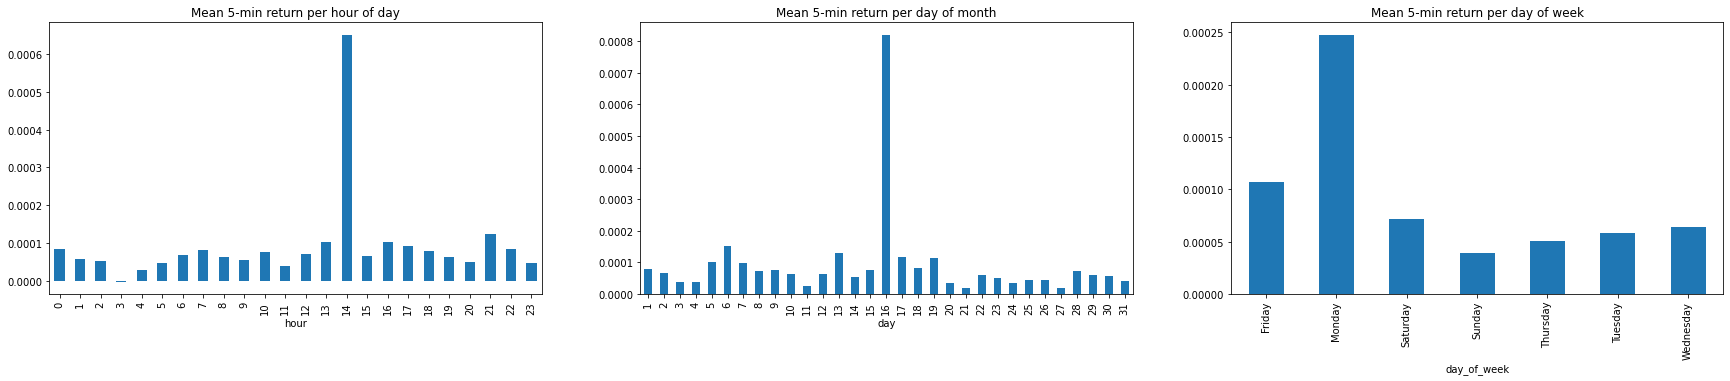

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
df_cal[df_cal["datetime"].dt.year > 2018].groupby("hour")["return"].mean().plot.bar(ax=axes[0], title="Mean 5-min return per hour of day");
df_cal[df_cal["datetime"].dt.year > 2018].groupby("day_of_week")["return"].mean().plot.bar(ax=axes[2], title="Mean 5-min return per day of week");
df_cal[df_cal["datetime"].dt.year > 2018].groupby("day")["return"].mean().plot.bar(ax=axes[1], title="Mean 5-min return per day of month");

# First strategy: buy on friday morning, sell on friday evening

In [3]:
position = close.copy()
position = position.resample("B").last().shift().reindex(position.index, method="ffill") # Use spot of midnight on t for the full t+1 day
position["day_of_week"] = position.index.dayofweek
position["day_of_week"] = position["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
position = position.where(position["day_of_week"] == "Friday", np.nan)
position.drop("day_of_week", axis=1, inplace=True)

In [4]:
nbr_assets = position.notnull().sum(axis=1)
weight = (1. / position).div(nbr_assets, axis=0) * 100
notional = weight * close

pnl = (weight * close.diff()).fillna(0.)
pnl_total = pnl.sum(axis=1)

pnl_daily = pnl.resample("B").sum().cumsum()
pnl_total_daily = pnl_daily.sum(axis=1)

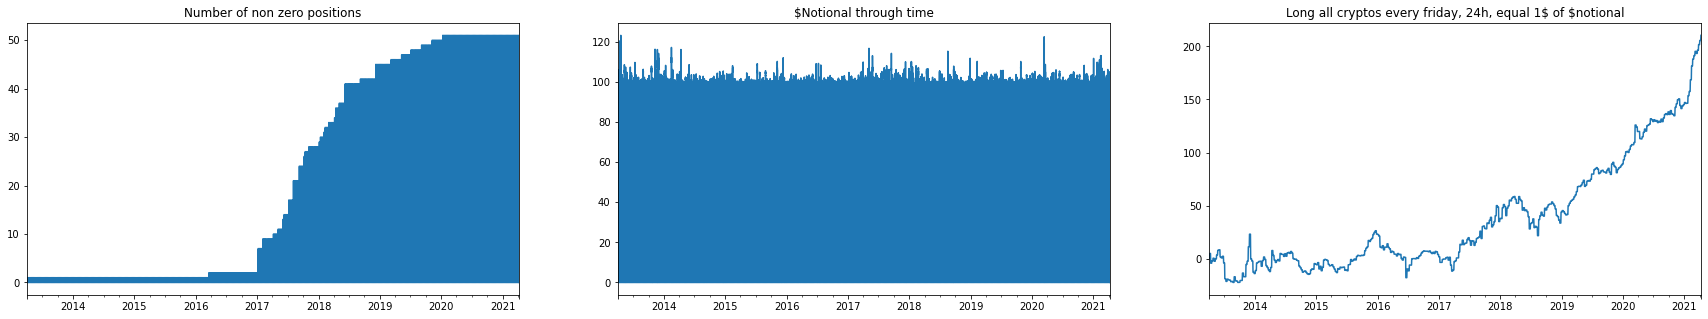

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
nbr_assets.plot(ax=axes[0], title="Number of non zero positions");
notional.sum(axis=1).plot(ax=axes[1], title="$Notional through time");
pnl_total_daily.plot(ax=axes[2], title="Long all cryptos every friday, 24h, equal 1\$ of \$notional");

In [16]:
account_curve_statistics(pnl_total_daily.loc["2017":])

Mean $Return      68.357533
Stddev $Return    36.401267
Sharpe            27.542982
dtype: float64

In [65]:
best_10_pnl = pnl.sum().nlargest(10)
worst_10_pnl = pnl.sum().nsmallest(10)

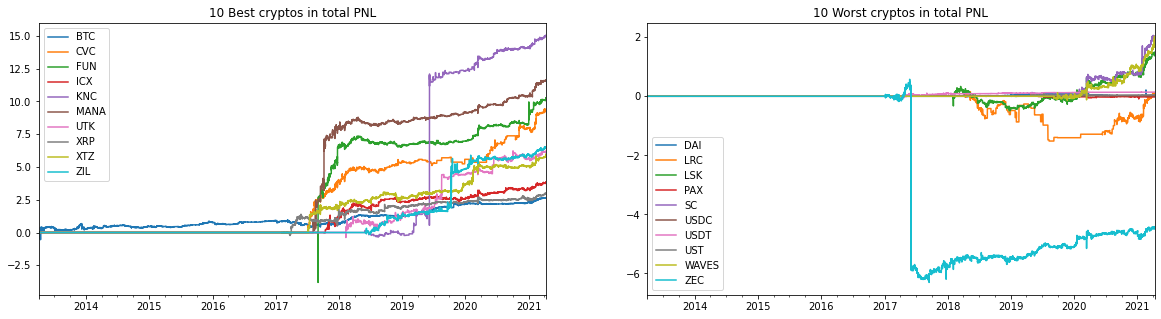

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
pnl[[x for x in pnl.columns if x in best_10_pnl.index]].plot(ax=axes[0], title="10 Best cryptos in total PNL");
pnl[[x for x in pnl.columns if x in worst_10_pnl.index]].plot(ax=axes[1], title="10 Worst cryptos in total PNL");

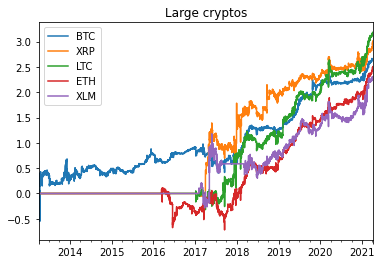

In [8]:
pnl[["BTC", "XRP", "LTC", "ETH", "XLM"]].plot(title="Large cryptos");

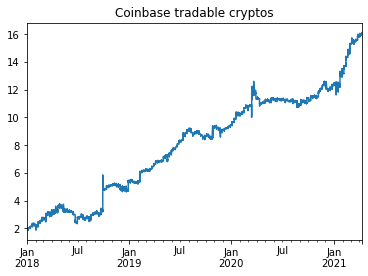

In [14]:
fig, axes = plt.subplots(1, 1)
pnl[["BTC", "LTC", "ADA", "ETH", "LINK", "XLM"]].sum(axis=1).loc["2018":].plot(title="Coinbase tradable cryptos");

# Trading only on mondays

In [25]:
position = close.copy()
position["day_of_week"] = position.index.dayofweek
position["day_of_week"] = position["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
position = position.where(position["day_of_week"] == "Monday", np.nan)
position.drop("day_of_week", axis=1, inplace=True)
position = (1. / position).shift()

In [26]:
pnl_daily = (position.shift() * close.diff()).fillna(0.)
pnl = pnl_daily.cumsum()

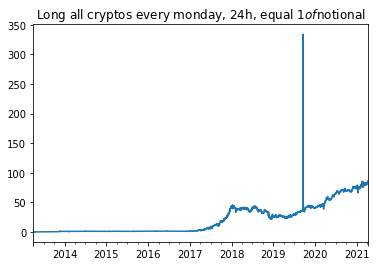

In [27]:
pnl.sum(axis=1).plot(title="Long all cryptos every monday, 24h, equal 1$ of $notional");

In [28]:
best_10_pnl = pnl.sum().nlargest(10)
worst_10_pnl = pnl.sum().nsmallest(10)

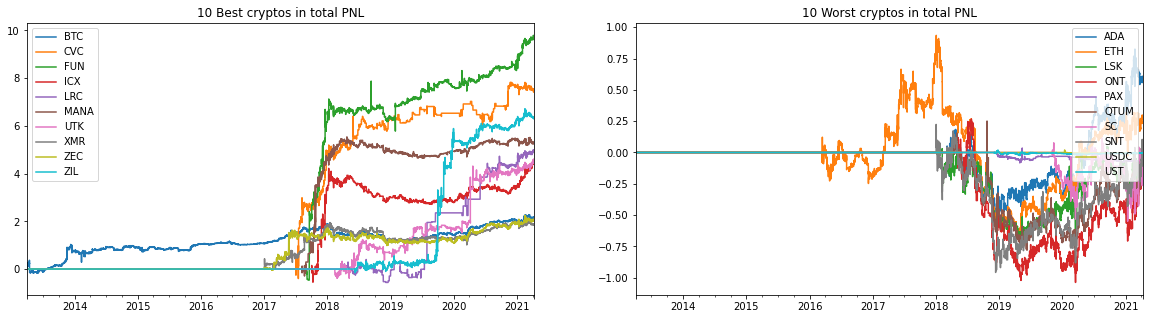

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
pnl[[x for x in pnl.columns if x in best_10_pnl.index]].plot(ax=axes[0], title="10 Best cryptos in total PNL");
pnl[[x for x in pnl.columns if x in worst_10_pnl.index]].plot(ax=axes[1], title="10 Worst cryptos in total PNL");

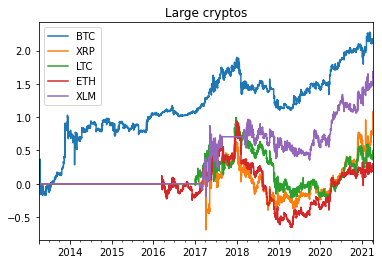

In [30]:
pnl[["BTC", "XRP", "LTC", "ETH", "XLM"]].plot(title="Large cryptos");

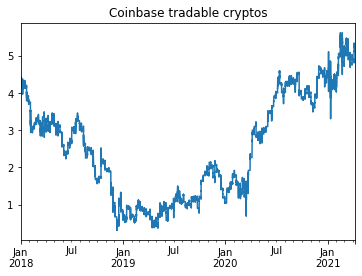

In [31]:
fig, axes = plt.subplots(1, 1)
pnl[["BTC", "LTC", "ADA", "ETH", "LINK", "XLM"]].sum(axis=1).loc["2018":].plot(title="Coinbase tradable cryptos");